# Q6

In [0]:
%matplotlib inline
import igraph # install using wheel (.whl) from https://www.lfd.uci.edu/~gohlke/pythonlibs/#python-igraph
import json # native
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv')
# Use only December data
travel_times = df[df['month'] == 12]
travel_times = travel_times[['sourceid', 'dstid', 'mean_travel_time']]
g = igraph.Graph.TupleList(travel_times.itertuples(index=False), directed=False, weights=True)

In [0]:
v_data = {}
with open("san_francisco_censustracts.json", encoding='utf-8') as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
        coor = feature["geometry"]["coordinates"][0][0]
        addr = feature["properties"]["DISPLAY_NAME"]
        c1 = []
        c2 = []
        for d in coor:
            c1.append(d[0])
            c2.append(d[1])
        v_data[int(feature["properties"]["MOVEMENT_ID"])] = [addr, np.mean(c1), np.mean(c2)]
    
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            Stanford_id = feature["properties"]["MOVEMENT_ID"]
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            UCSC_id = feature["properties"]["MOVEMENT_ID"]
g.vs['display_name'] = [v_data[k][0] for k in g.vs['name']]
g.vs['location'] = [v_data[k][-2:] for k in g.vs['name']]
g_sim = g.simplify(multiple=True, combine_edges='mean')
gcc = g_sim.components().giant()
print('Number of nodes = {}'.format(len(g.vs)))
print('Number of edges = {}'.format(len(gcc.es)))

Number of nodes = 1905
Number of edges = 320916


# Q7

In [0]:
g_mst = gcc.spanning_tree(weights=gcc.es['weight'])
print('Few examples of edges in minimum spanning tree:\n')
for edge in g_mst.es[10:15]:
    source = edge.source
    dest = edge.target
    print('Start: ', g_mst.vs[source]['display_name'])
    print('Dest : ', g_mst.vs[dest]['display_name'])
    print('Mean travel time: ', edge['weight'])
    print('-----------------------------------------------------\n')

Few examples of edges in minimum spanning tree:

Start:  1000 Neilson Street, Albany
Dest :  1000 Cornell Avenue, Albany
Mean travel time:  122.57499999999999
-----------------------------------------------------

Start:  1000 Manet Drive, Sunnyvale
Dest :  800 Hanover Avenue, Sunnyvale West, Sunnyvale
Mean travel time:  157.675
-----------------------------------------------------

Start:  1000 Manet Drive, Sunnyvale
Dest :  700 Gail Avenue, Sunnyvale
Mean travel time:  152.735
-----------------------------------------------------

Start:  600 Vanessa Drive, Central San Mateo, San Mateo
Dest :  1700 Eisenhower Street, Shoreview, San Mateo
Mean travel time:  96.53999999999999
-----------------------------------------------------

Start:  600 Vanessa Drive, Central San Mateo, San Mateo
Dest :  300 East 28th Avenue, South San Mateo, San Mateo
Mean travel time:  130.39
-----------------------------------------------------



# Q8

In [0]:
gcc_edge = []
for e in gcc.es:
    gcc_edge.append([e.source, e.target, e['weight']])
gcc_edge = np.array(gcc_edge)

In [0]:
from tqdm import tqdm # progress bar

def sample_1000_triangles(edge_list):
    triangles = []
    count = 0
    eidx_rand = np.random.randint(low=0, high=len(gcc_edge)-1)
    for e_id in range(eidx_rand, len(gcc_edge)): #to increase randomness in selection of triangles
        p1 = gcc_edge[e_id, 0]
        p2 = gcc_edge[e_id, 1]
        e12 = gcc_edge[e_id, 2] # travel time (weight of edge)
        for e2 in gcc_edge[e_id:]:
            if e2[0]==p1:
                p3 = e2[1]
                e13 = e2[2] # travel time (weight of edge)
                idx_edge_p2p3 = np.where(np.logical_or(np.logical_and(gcc_edge[:,0]==p2, gcc_edge[:,1]==p3),
                                                       np.logical_and(gcc_edge[:,0]==p3, gcc_edge[:,1]==p2)))[0]
                if idx_edge_p2p3.size:
                    e23 = gcc_edge[idx_edge_p2p3, 2] # travel time (weight of edge)
                    triangles.append([p1,p2,p3,e12,e13,e23])
                    count += 1
                    if count>=1000:
                        return triangles

triangles = sample_1000_triangles(gcc_edge)

In [0]:
valid_count = 0
for triangle in triangles:
    e = sorted(triangle[3:])
    if e[0]+e[1]>=e[2]:
        valid_count += 1
valid_percent = valid_count/len(triangles)*100
print('Percent of triangles in graph satisfying triangle inequality = {} %'.format(valid_percent))

Percent of triangles in graph satisfying triangle inequality = 94.6 %


# Q9

In [0]:
g_multi = g_mst.as_directed(mutual=True) # multigraph
print(g_multi)

IGRAPH DNW- 1898 3794 --
+ attr: display_name (v), location (v), name (v), weight (e)
+ edges (vertex names):
1982->7, 1982->1995, 1982->2542, 73->1204, 73->1995, 73->1203, 2213->886,
2213->457, 1523->1524, 1523->1522, 1523->1070, 438->1827, 438->2304,
433->2613, 433->1454, 448->1554, 333->2424, 333->468, 333->389, 2231->1729,
315->2697, 315->338, 2202->1029, 2202->1634, 605->888, 605->1597, 2250->1467,
2250->685, 2250->1759, 125->1850, 125->562, 1762->1759, 1762->1209,
1762->1763, 1728->1743, 1760->1469, 1760->1761, 1748->680, 1748->2510,
1743->2505, 1743->234, 1918->419, 1918->722, 1750->1467, 1750->2244,
1848->1849, 1770->2695, 1770->967, 1648->2321, 1781->2673, 1781->908,
1781->1703, 1781->82, 1538->593, 1690->905, 2448->817, 2448->2512, 1691->644,
1691->1245, 2438->1065, 97->596, 624->1025, 624->1031, 624->171, 83->941,
83->2011, 83->777, 764->27, 764->2470, 764->2060, 87->927, 87->741, 724->2173,
724->1330, 77->820, 824->1935, 824->1332, 824->1329, 2344->1298, 2344->535,
2344->17

In [0]:
import networkx as nx

edgelist = g_multi.get_edgelist()
g_nx = nx.DiGraph(edgelist) 

In [0]:
startNode = 117
path = list(nx.eulerian_circuit(g_nx, source=startNode))

In [0]:
tour = []
tour_cost = 0 # If triangle inequality always holds !

locations = []

for p in path:
    n1 = p[0]
    n2 = p[1]
    if n1 not in tour:
        tour.append(n1)
        tour_cost += g_multi.es.select(_source = n1, _target = n2)['weight'][0]
        locations.append(g_multi.vs.select(n1)['display_name'])
print('1-approximation TSP cost: ', tour_cost)    

1-approximation TSP cost:  303477.7550000001


In [0]:
locations[:5]

[['2600 Somerset Drive, Belmont'],
 ['1400 Crestwood Court, South San Mateo, San Mateo'],
 ['1600 Parrott Drive, South San Mateo, San Mateo'],
 ['2700 Campus Drive, Beresford Park, San Mateo'],
 ['200 West 25th Avenue, South San Mateo, San Mateo']]

In [0]:
mst_cost = 0 # upper bound of optimal TSP
for edge in g_mst.es:
    mst_cost += edge['weight']
print('Optimal TSP cost upper bound (MST cost): ', mst_cost)

Optimal TSP cost upper bound (MST cost):  289315.67499999964


In [0]:
print('Upper bound rho: ', tour_cost/mst_cost)
print('Sanity check: ', (tour_cost - mst_cost)/mst_cost)

Upper bound rho:  1.0489502685950234
Sanity check:  0.04895026859502341


# Q10

In [0]:
lat = [] # 2nd float in vertex data
long = [] # 1st float in vertex data

for node in tour:
    n = g_multi.vs.select(node)['location']
    #print(n)
    lat.append(n[0][0])
    long.append(n[0][1])



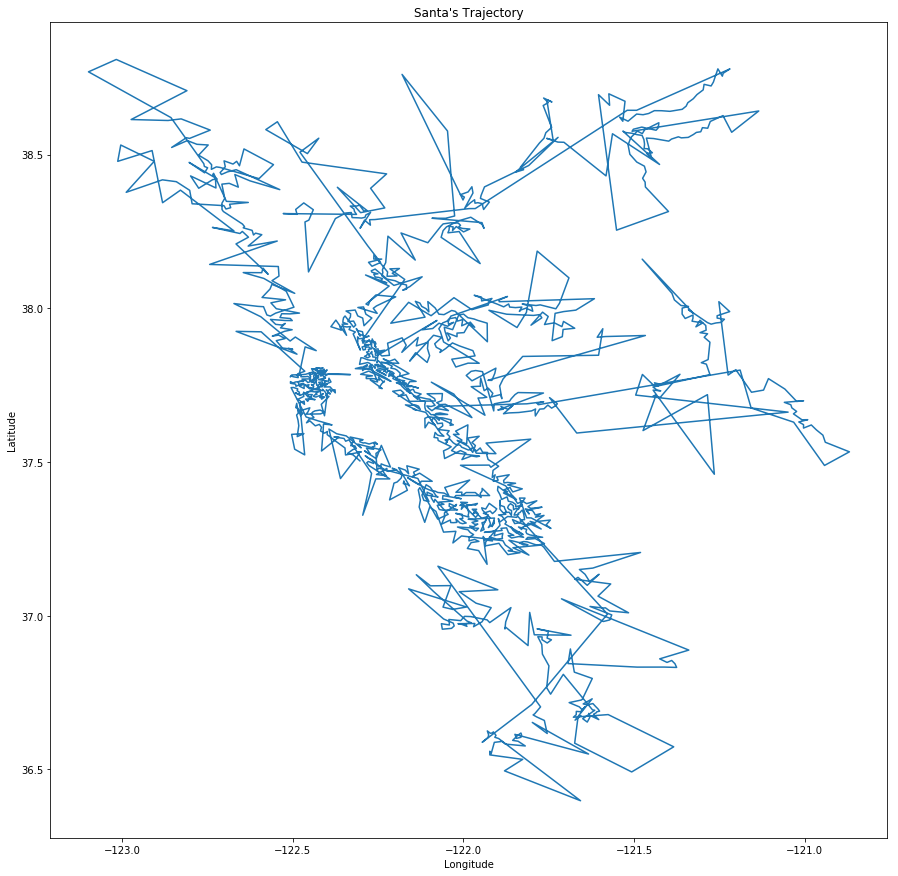

In [0]:
plt.figure(figsize=(15, 15))
plt.title("Santa's Trajectory")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(lat, long)

# Q11

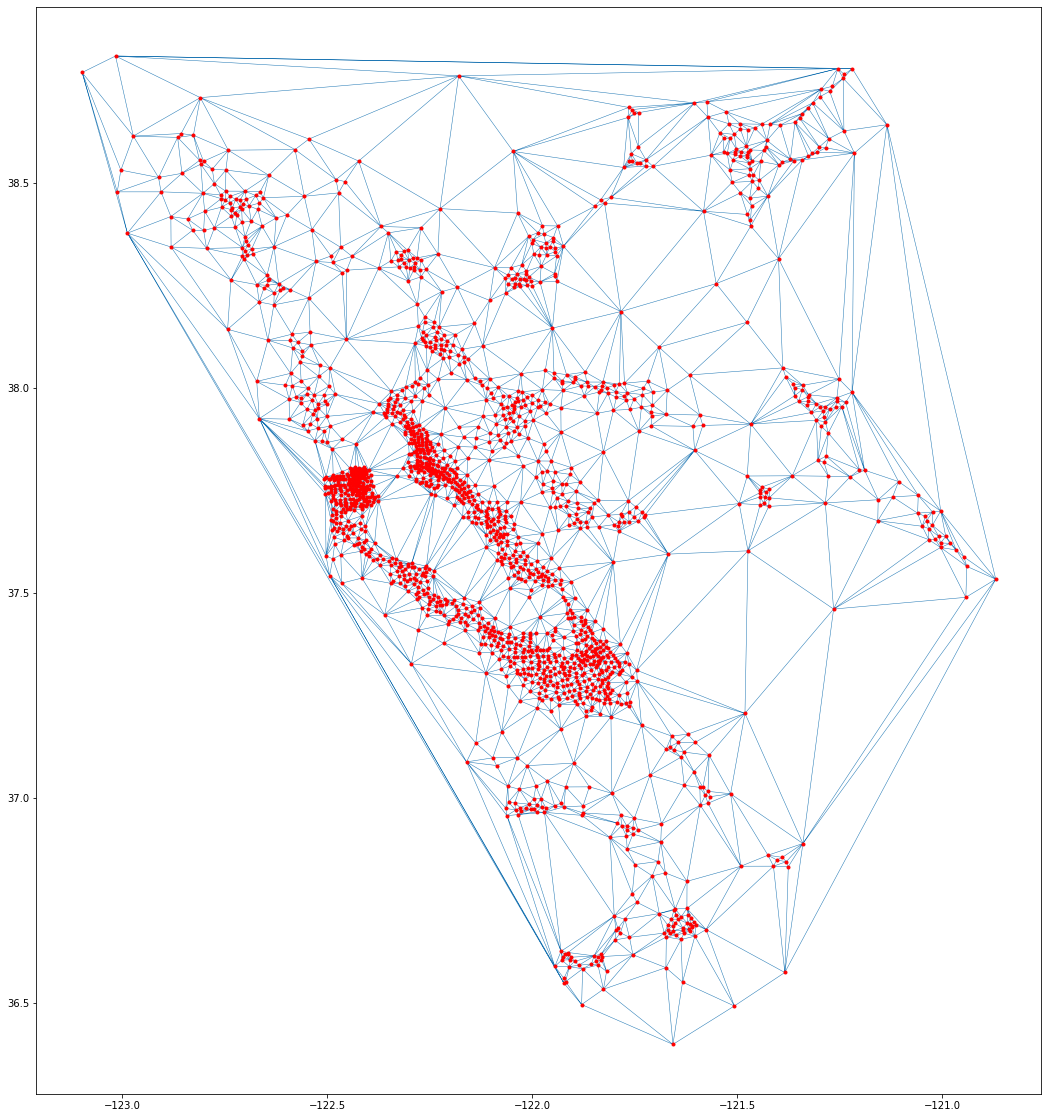

In [0]:
%matplotlib inline
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import matplotlib.tri as mpltri

points = np.array(gcc.vs['location'])
plt.figure(figsize=(30,20))
triangulation = mpltri.Triangulation(points[:,0], points[:,1])
plt.triplot(triangulation, lw=0.5)
plt.plot(points[:,0], points[:,1], 'ro', ms=3)
plt.axis('scaled')
plt.show()

# Q12

In [0]:
tri_e = (triangulation.edges)
g_road = igraph.Graph()
g_road.add_vertices(np.unique(tri_e))
g_road.add_edges(tri_e)

In [0]:
for tri_edge_id, tri_edge in enumerate(triangulation.edges):
    tri_source = tri_edge[0]
    tri_target = tri_edge[1]
    idx = np.where(np.logical_or(np.logical_and(gcc_edge[:,0]==tri_source, gcc_edge[:,1]==tri_target),
                                 np.logical_and(gcc_edge[:,1]==tri_source, gcc_edge[:,0]==tri_target)))
    t = np.squeeze(gcc_edge[idx,-1])
    loc_source = np.array(gcc.vs[tri_source]['location'])
    loc_target = np.array(gcc.vs[tri_target]['location'])
    dist = np.linalg.norm(loc_source - loc_target)
    v = 69*dist/t
    flow = 2*3600/(2+0.003/v)
    g_road.es[tri_edge_id]['capacity'] = flow
    g_road.es[tri_edge_id]['travel_time'] = t
    
print('A few examples of edges produced by triangulation')
for e in g_road.es[0:5]:
    print('Start: ', gcc.vs[e.source]['display_name'])
    print('Dest : ', gcc.vs[e.target]['display_name'])
    print('Flow: ', e['capacity'])
    print('-----------------------------------------------------\n')

A few examples of edges produced by triangulation
Start:  100 Garden Lane, Millbrae
Dest :  800 Easton Avenue, San Bruno
Flow:  2721.878007589442
-----------------------------------------------------

Start:  100 Garden Lane, Millbrae
Dest :  600 San Bruno Avenue East, San Bruno
Flow:  2843.7728274696124
-----------------------------------------------------

Start:  800 Easton Avenue, San Bruno
Dest :  600 San Bruno Avenue East, San Bruno
Flow:  2276.1631937286566
-----------------------------------------------------

Start:  200 Shorebird Circle, Redwood Shores, Redwood City
Dest :  700 Industrial Road, San Carlos
Flow:  2742.368339506426
-----------------------------------------------------

Start:  200 O'Farrell Street, Tenderloin, San Francisco
Dest :  0 Mason Street, Tenderloin, San Francisco
Flow:  1831.6932919939802
-----------------------------------------------------



# Q13

In [0]:
# print('Stanford_id:', Stanford_id)
# print('UCSC_id:', UCSC_id)
for v_id, v in enumerate(gcc.vs):
    if v['name']==int(Stanford_id):
        Stanford_vid = v_id
    if v['name']==int(UCSC_id):
        UCSC_vid = v_id
# print('Stanford_vid:', Stanford_vid)
# print('UCSC_vid:', UCSC_vid)
mf = g_road.maxflow(Stanford_vid, UCSC_vid, capacity=g_road.es['capacity'])
print('max flow from Stanford to UCSC = {} cars/hour'.format(mf.value))
n_disjoint_paths = g_road.edge_disjoint_paths(Stanford_vid, UCSC_vid)
print('n_disjoint_paths =', n_disjoint_paths)

max flow from Stanford to UCSC = 14866.477294089273 cars/hour
n_disjoint_paths = 5


# Q14

In [0]:
max_travel_time = 1250
edges_removed = []
for e_id, e in enumerate(g_road.es):
    if (e['travel_time'] > max_travel_time) or (e['travel_time'].size == 0):
        edges_removed.append(e_id)
g_road.delete_edges(edges_removed)

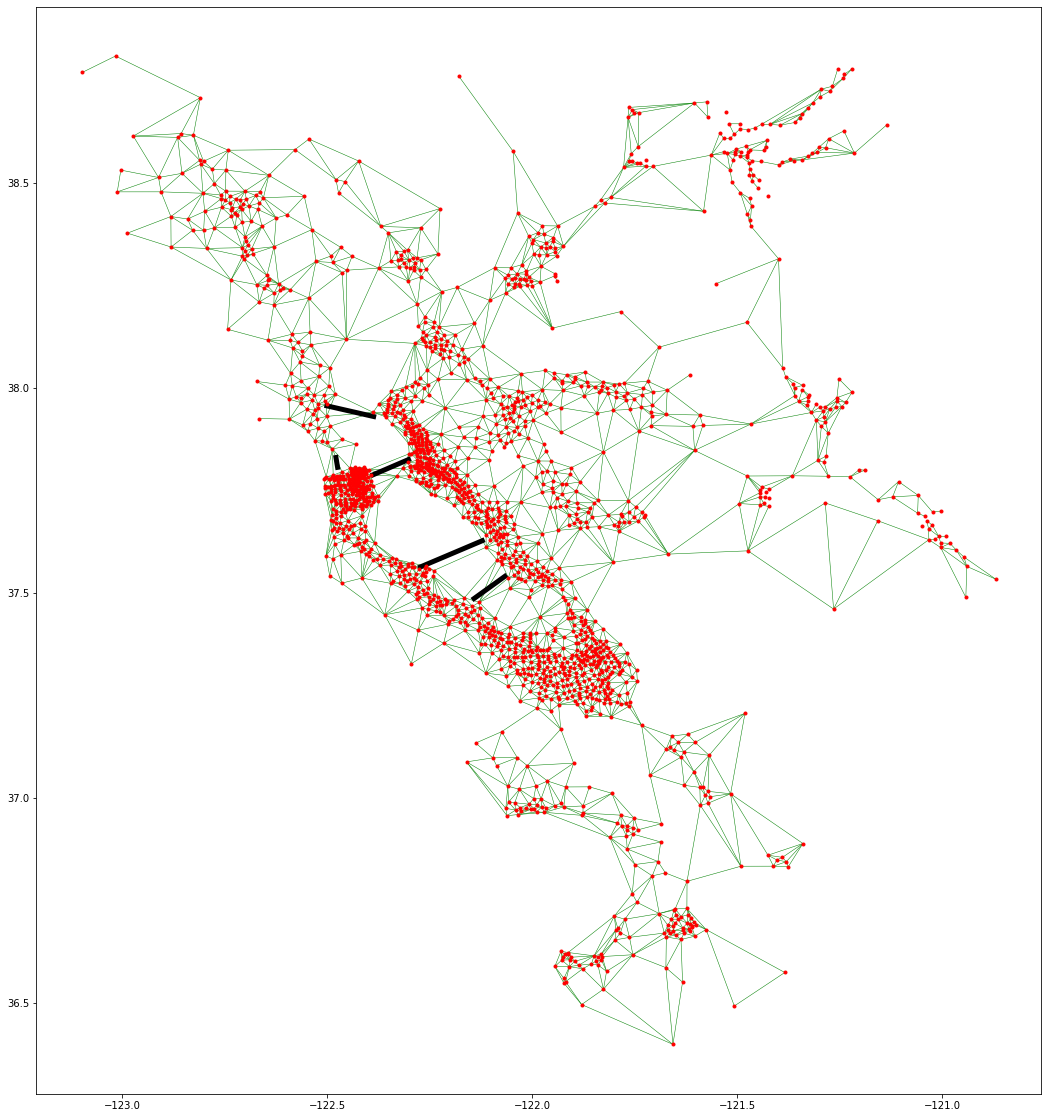

In [0]:
# • Golden Gate Bridge: [[-122.475, 37.806], [-122.479, 37.83]]
# • Richmond, San Rafael Bridge: [[-122.501, 37.956], [-122.387, 37.93]]
# • San Mateo Bridge: [[-122.273, 37.563], [-122.122, 37.627]]
# • Dambarton Bridge: [[-122.142, 37.486], [-122.067, 37.54]]
# • San Francisco - Oakland Bay Bridge: [[-122.388, 37.788], [-122.302, 37.825]]
bridge1 = np.array([[-122.475, 37.806], [-122.479, 37.83]])
bridge2 = np.array( [[-122.501, 37.956], [-122.387, 37.93]])
bridge3 = np.array([[-122.273, 37.563], [-122.122, 37.627]])
bridge4 = np.array([[-122.142, 37.486], [-122.067, 37.54]])
bridge5 = np.array([[-122.388, 37.788], [-122.302, 37.825]])

plt.figure(figsize=(30,20))
for e_id, e in enumerate(g_road.es):
    scr_loc = np.array(gcc.vs[e.source]['location'])
    targ_loc = np.array(gcc.vs[e.target]['location'])
    loc = np.vstack((scr_loc, targ_loc))
    plt.plot(loc[:,0], loc[:,1],'g', lw=0.5)
plt.plot(bridge1[:,0], bridge1[:,1], 'k', lw=5)
plt.plot(bridge2[:,0], bridge2[:,1], 'k', lw=5)
plt.plot(bridge3[:,0], bridge3[:,1], 'k', lw=5)
plt.plot(bridge4[:,0], bridge4[:,1], 'k', lw=5)
plt.plot(bridge5[:,0], bridge5[:,1], 'k', lw=5)
plt.plot(points[:,0], points[:,1], 'ro', ms=3)
plt.axis('scaled')
plt.show()


# Q15

In [0]:
mf_pruned = g_road.maxflow(Stanford_vid, UCSC_vid, capacity=g_road.es['capacity'])
print('max flow from Stanford to UCSC = {} cars/hour'.format(mf_pruned.value))
n_disjoint_paths_pruned = g_road.edge_disjoint_paths(Stanford_vid, UCSC_vid)
print('n_disjoint_paths =', n_disjoint_paths_pruned)

max flow from Stanford to UCSC = 14866.477294089276 cars/hour
n_disjoint_paths = 5
